In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jonathanoheix/face-expression-recognition-dataset")

print("Path to dataset files:", path)

100%|██████████| 121M/121M [00:03<00:00, 35.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1


In [2]:
# Install essential libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import os

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Dataset paths
dataset_path = "/root/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1/images/"
train_dir = os.path.join(dataset_path, "images/train")
test_dir = os.path.join(dataset_path, "images/validation")

# Print the dataset contents
print("Contents of dataset folder:", os.listdir(dataset_path))
#dataset_path = "/root/.cache/kagglehub/datasets/chiragsoni/ferdata/versions/"
#train_dir = os.path.join(dataset_path, "1/train")
#test_dir = os.path.join(dataset_path, "1/test")
import os



# Drill down to find the train and test directories
# for root, dirs, files in os.walk(dataset_path):
#     print(f"Root: {root}, Dirs: {dirs}, Files: {files}")

# Data generators with validation split
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2  # 20% of training data will be used for validation
)

# Training data generator
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    subset='training',  # Use the training split
    shuffle=True
)

# Validation data generator
validation_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use the validation split
)

# Test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Keep the order consistent for evaluation
)

print(f"Training samples: {train_data.samples}")
print(f"Validation samples: {validation_data.samples}")
print(f"Test samples: {test_data.samples}")

Contents of dataset folder: ['images', 'validation', 'train']
Found 23060 images belonging to 7 classes.
Found 5761 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Training samples: 23060
Validation samples: 5761
Test samples: 7066


In [ ]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(48, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 48)          │          27,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 32)            │          13,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │           8,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             119 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,671 (201.84 KB)

 Trainable params: 51,671 (201.84 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 100 #25

history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=epochs,
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


721/721 ━━━━━━━━━━━━━━━━━━━━ 62s 65ms/step - accuracy: 0.2398 - loss: 1.8357 - val_accuracy: 0.2486 - val_loss: 1.8118
Epoch 2/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.2432 - loss: 1.8115 - val_accuracy: 0.2559 - val_loss: 1.7782
Epoch 3/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 38s 51ms/step - accuracy: 0.2603 - loss: 1.7789 - val_accuracy: 0.2708 - val_loss: 1.7630
Epoch 4/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 44s 55ms/step - accuracy: 0.2656 - loss: 1.7674 - val_accuracy: 0.2930 - val_loss: 1.7348
Epoch 5/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 37s 50ms/step - accuracy: 0.2848 - loss: 1.7359 - val_accuracy: 0.2951 - val_loss: 1.7089
Epoch 6/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 37s 50ms/step - accuracy: 0.3056 - loss: 1.7010 - val_accuracy: 0.3216 - val_loss: 1.6729
Epoch 7/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.3289 - loss: 1.6585 - val_accuracy: 0.3640 - val_loss: 1.6105
Epoch 8/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 36s 50ms/step - accuracy: 0.3568 - loss: 1.6117 - val_

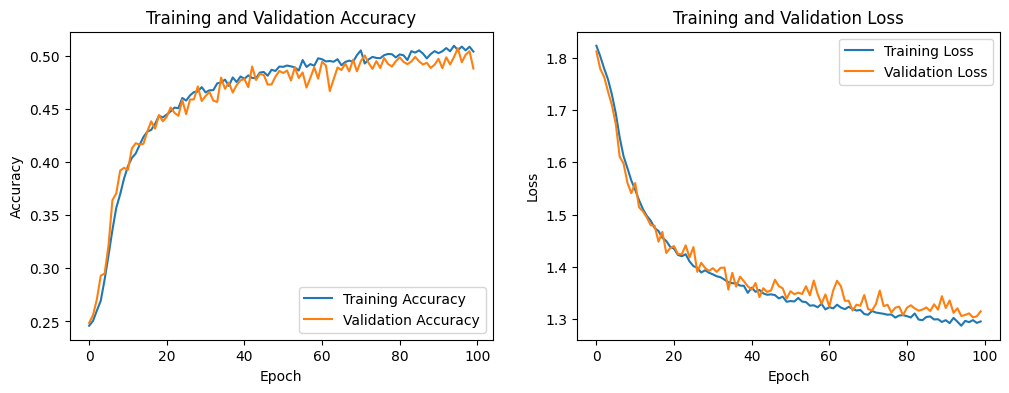

221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5162 - loss: 1.2532
Test Accuracy: 0.55
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
Classification Report:
               precision    recall  f1-score   support

       angry       0.41      0.56      0.47       960
     disgust       0.24      0.08      0.12       111
        fear       0.38      0.16      0.23      1018
       happy       0.74      0.84      0.79      1825
     neutral       0.47      0.60      0.53      1216
         sad       0.46      0.32      0.38      1139
    surprise       0.64      0.70      0.67       797

    accuracy                           0.55      7066
   macro avg       0.48      0.47      0.45      7066
weighted avg       0.53      0.55      0.53      7066



In [ ]:

# Plot accuracy
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


# Evaluate on test data
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2f}")

# Classification report and confusion matrix
test_data.reset()
predictions = model.predict(test_data, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = test_data.classes

print("Classification Report:\n", classification_report(y_true, y_pred, target_names=list(test_data.class_indices.keys())))


In [ ]:
model.save("facial_expression_model.h5")
print("Model saved as facial_expression_model.h5")


Model saved as facial_expression_model.h5


In [ ]:
from tensorflow.keras.preprocessing import image

def predict_emotion(img_path, model):
    img = image.load_img(img_path, target_size=(48, 48))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    class_label = list(test_data.class_indices.keys())[class_idx]

    return class_label

# Example usage
img_path = '/root/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1/images/test/sad/33928.jpg'
predicted_emotion = predict_emotion(img_path, model)
print(f"Predicted Emotion: {predicted_emotion}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
Predicted Emotion: sad
